<a href="https://colab.research.google.com/github/Shahidulla-Vantela/Fertility_Diagonosis/blob/main/Fertility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/fertility_Diagnosis.txt')
df.head()

,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [ ]:
df.columns = ['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting', 'diagonosis']
df.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagonosis
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


Season in which the analysis was performed. 	1) winter, 2) spring, 3) Summer, 4) fall. 	(-1, -0.33, 0.33, 1)

Age at the time of analysis. 	18-36 	(0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio)	1) yes, 2) no. 	(0, 1)

Accident or serious trauma 	1) yes, 2) no. 	(0, 1)

Surgical intervention 	1) yes, 2) no. 	(0, 1)

High fevers in the last year 	1) less than three months ago, 2) more than three months ago, 3) no. 	(-1, 0, 1)

Frequency of alcohol consumption 	1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never 	(0, 1)

Smoking habit 	1) never, 2) occasional 3) daily. 	(-1, 0, 1)

Number of hours spent sitting per day 	ene-16	(0, 1)

Output: Diagnosis	normal (N), altered (O)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 99 non-null     float64
 1   age                    99 non-null     float64
 2   child_diseases         99 non-null     int64  
 3   accident               99 non-null     int64  
 4   surgical_intervention  99 non-null     int64  
 5   high_fevers            99 non-null     int64  
 6   alcohol                99 non-null     float64
 7   smoking                99 non-null     int64  
 8   hrs_sitting            99 non-null     float64
 9   diagonosis             99 non-null     object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
season,0
age,0
child_diseases,0
accident,0
surgical_intervention,0
high_fevers,0
alcohol,0
smoking,0
hrs_sitting,0
diagonosis,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df:
  print(col, df[col].unique())

season [-0.33  1.   -1.    0.33]
age [0.94 0.5  0.75 0.67 1.   0.64 0.61 0.78 0.81 0.69 0.56 0.58 0.53 0.72
 0.92 0.86 0.89 0.83]
child_diseases [1 0]
accident [0 1]
surgical_intervention [1 0]
high_fevers [ 0 -1  1]
alcohol [0.8 1.  0.6 0.2 0.4]
smoking [ 1 -1  0]
hrs_sitting [0.31 0.5  0.38 0.44 0.25 0.13 0.63 0.19 0.75 1.   0.56 0.88 0.47 0.06]
diagonosis ['O' 'N']


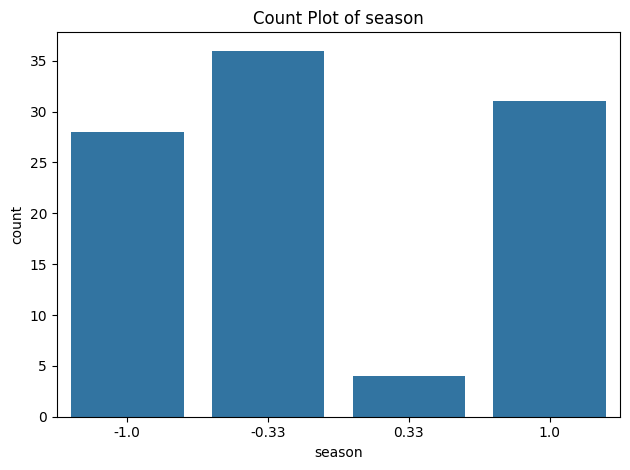

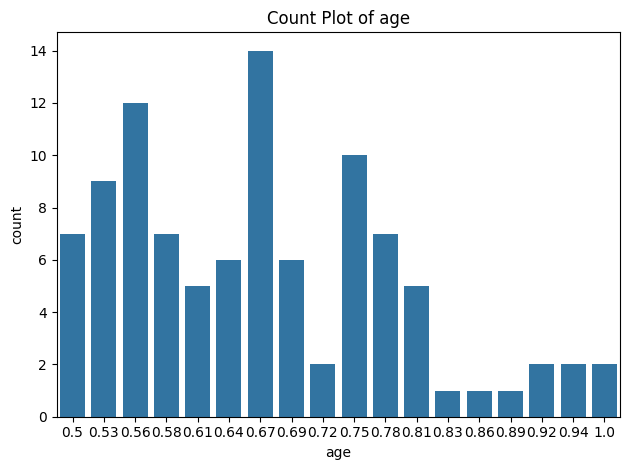

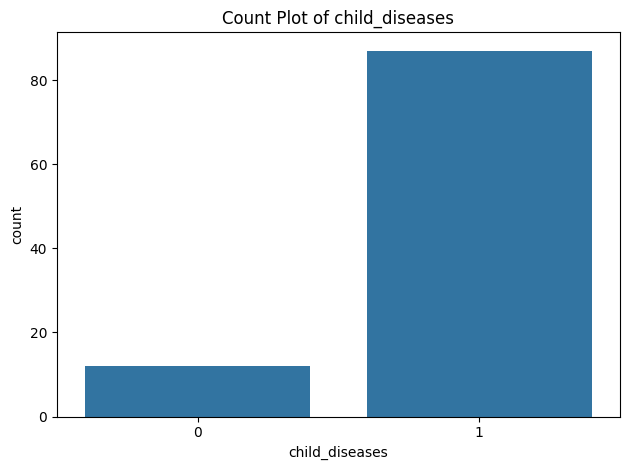

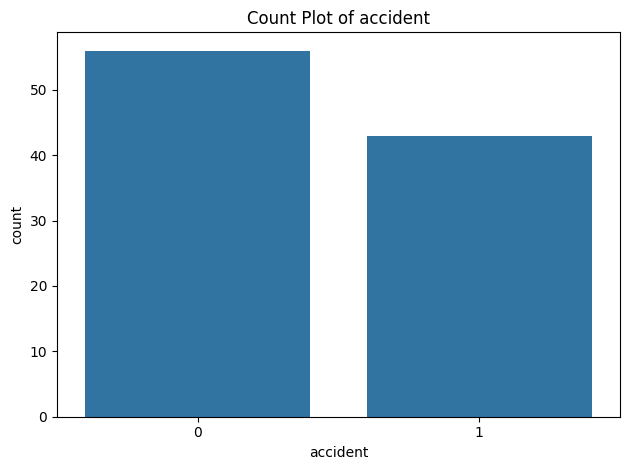

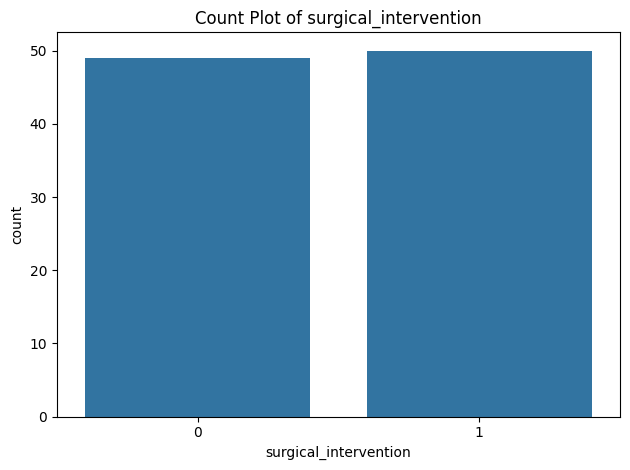

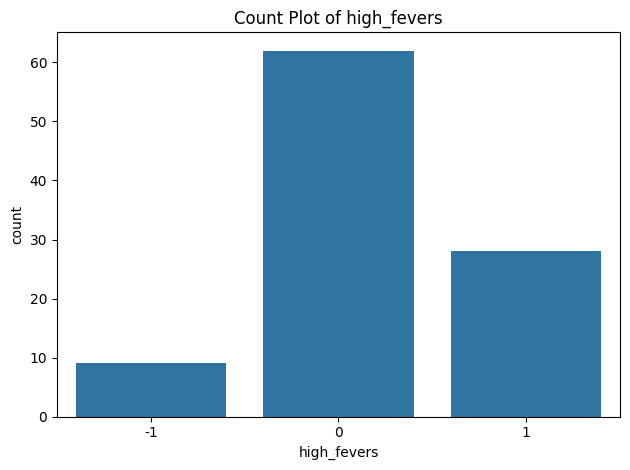

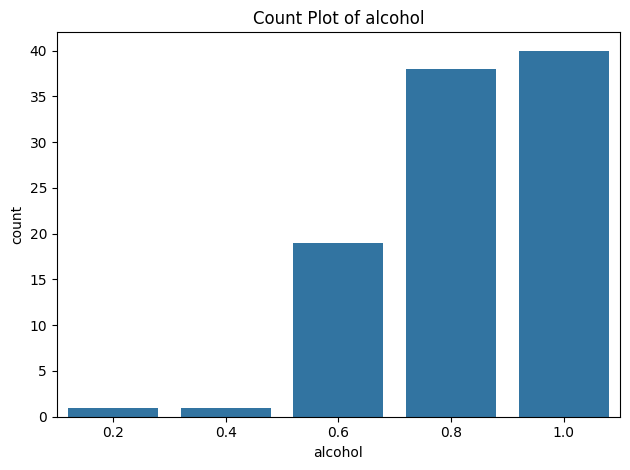

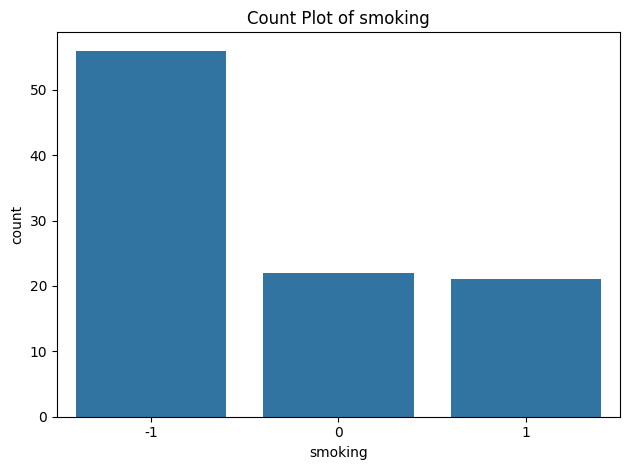

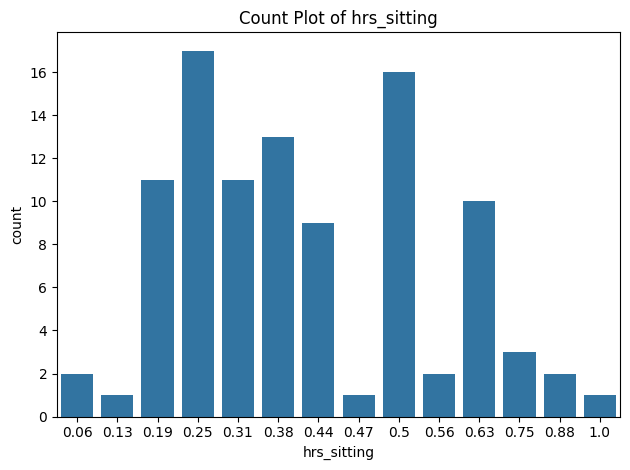

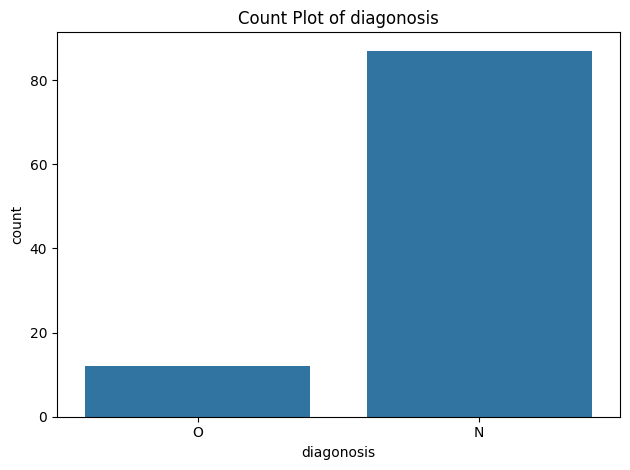

In [ ]:
for col in df:
  plt.figure()
  sns.countplot(data=df, x=col)
  plt.title(f'Count Plot of {col}')
  plt.tight_layout()
  plt.show()

Here, we can observe that our data is imbalanced.

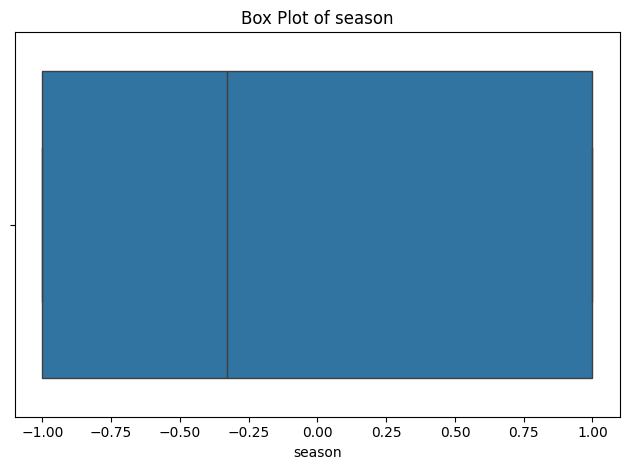

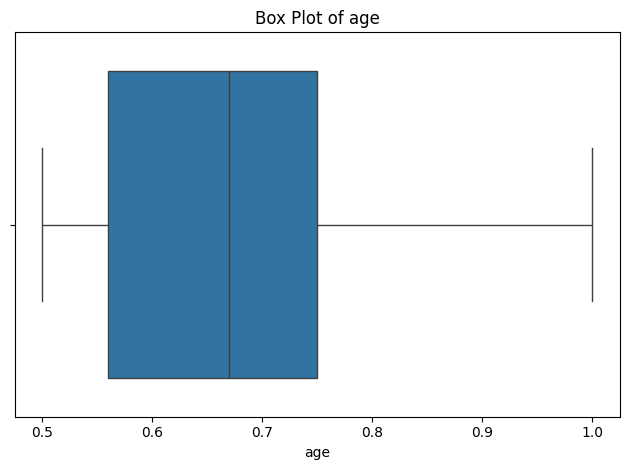

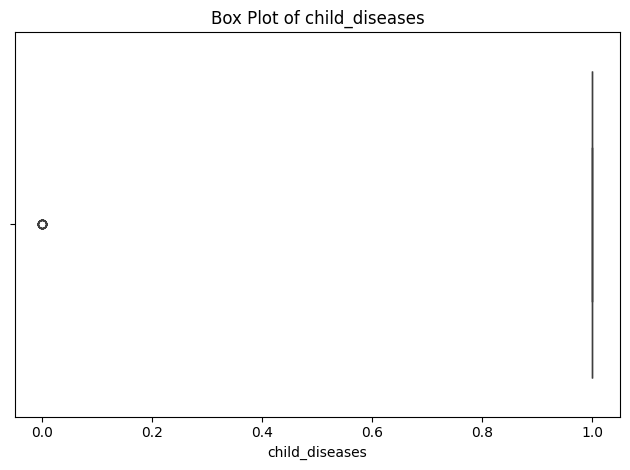

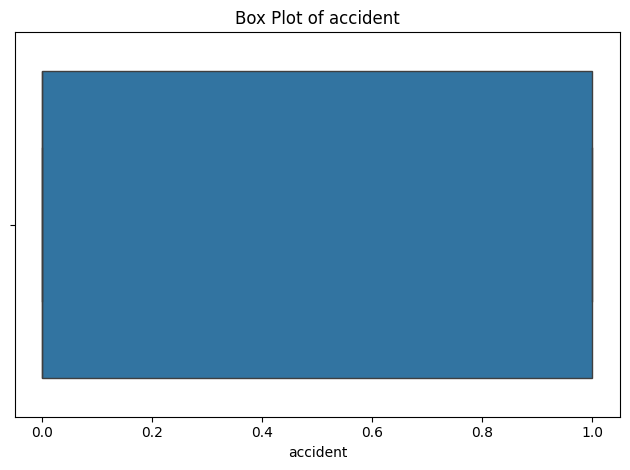

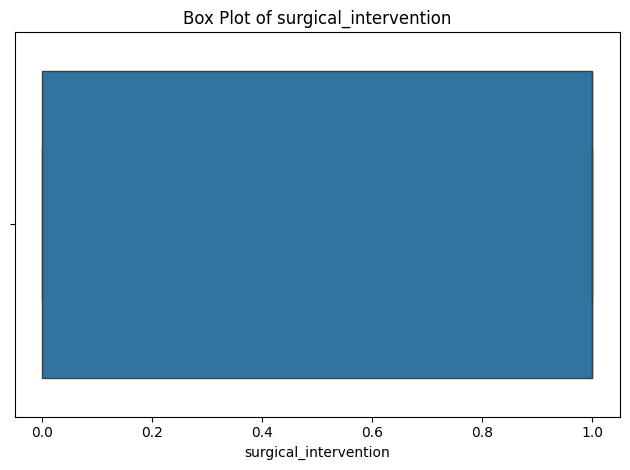

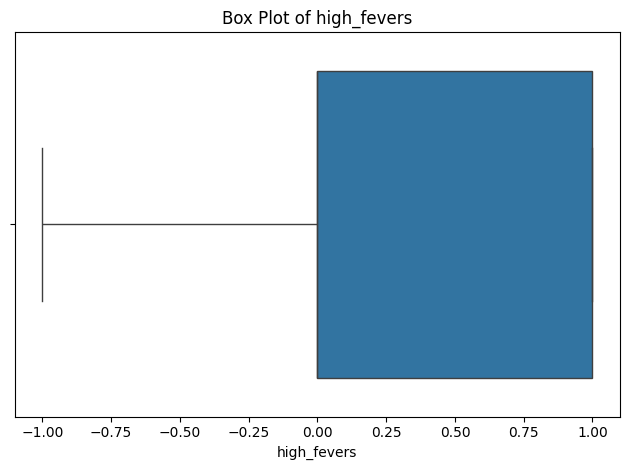

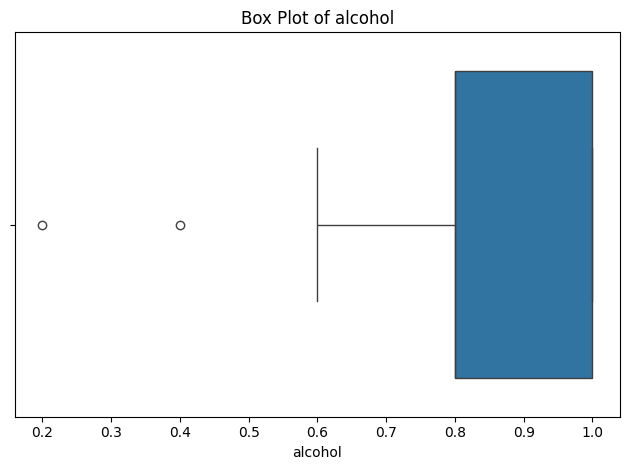

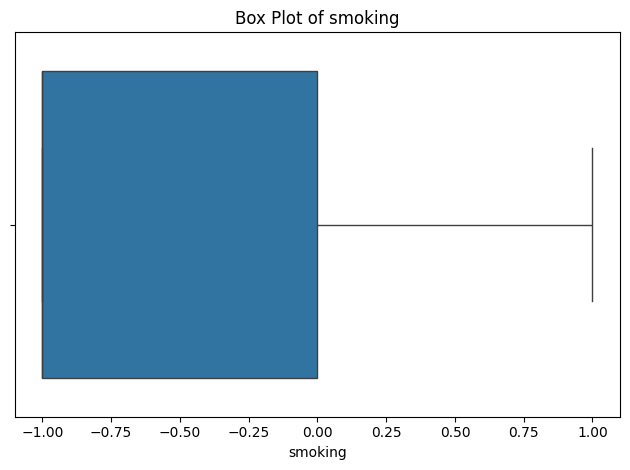

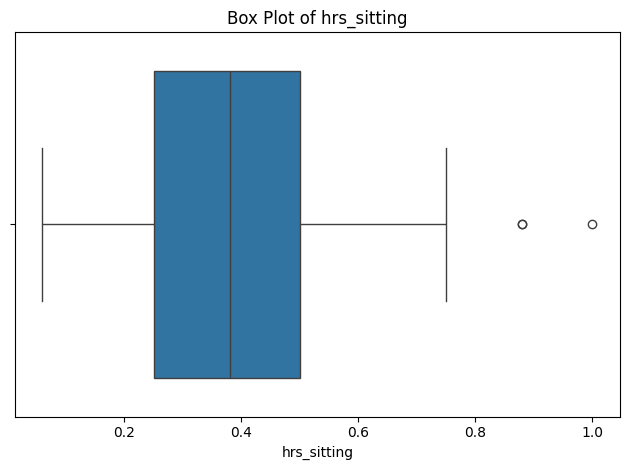

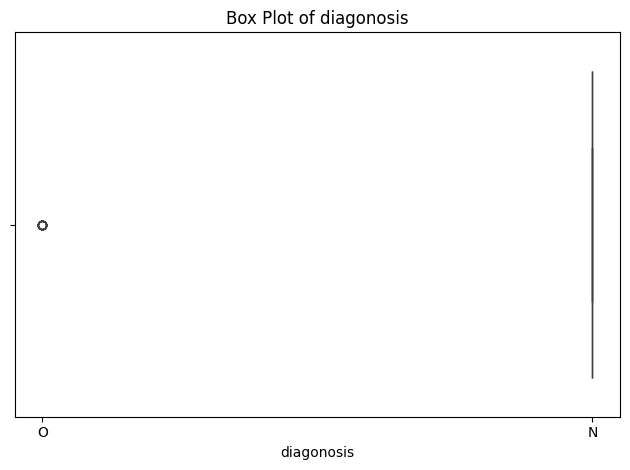

In [ ]:
for col in df:
  plt.figure()
  sns.boxplot(data=df, x=col)
  plt.title(f'Box Plot of {col}')
  plt.tight_layout()
  plt.show()

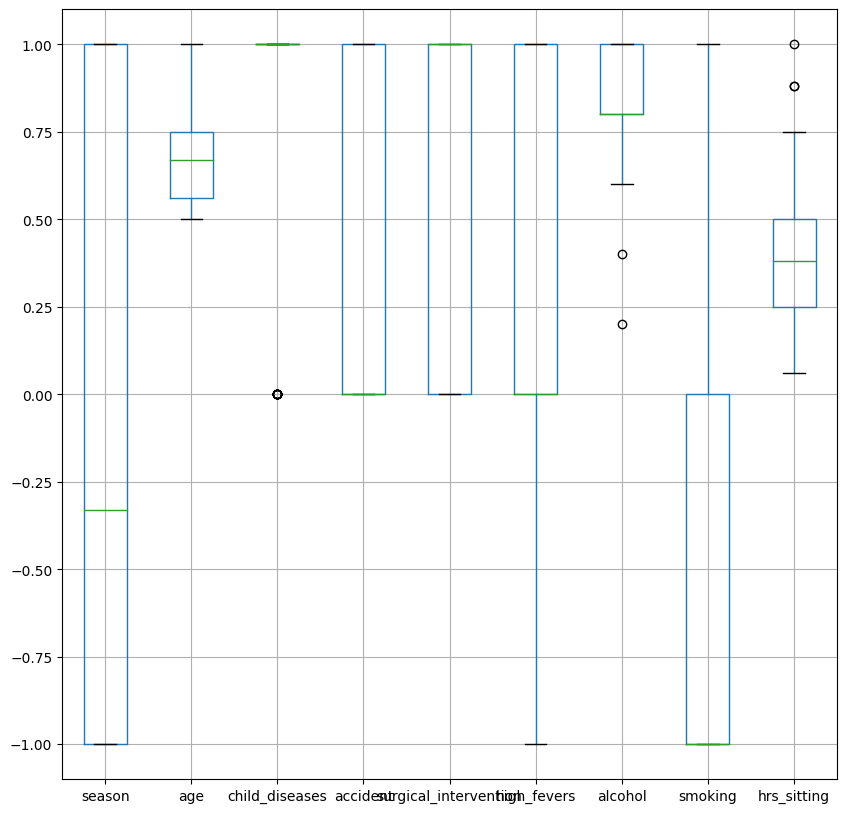

In [ ]:
df.boxplot(figsize=(10,10))
plt.show()

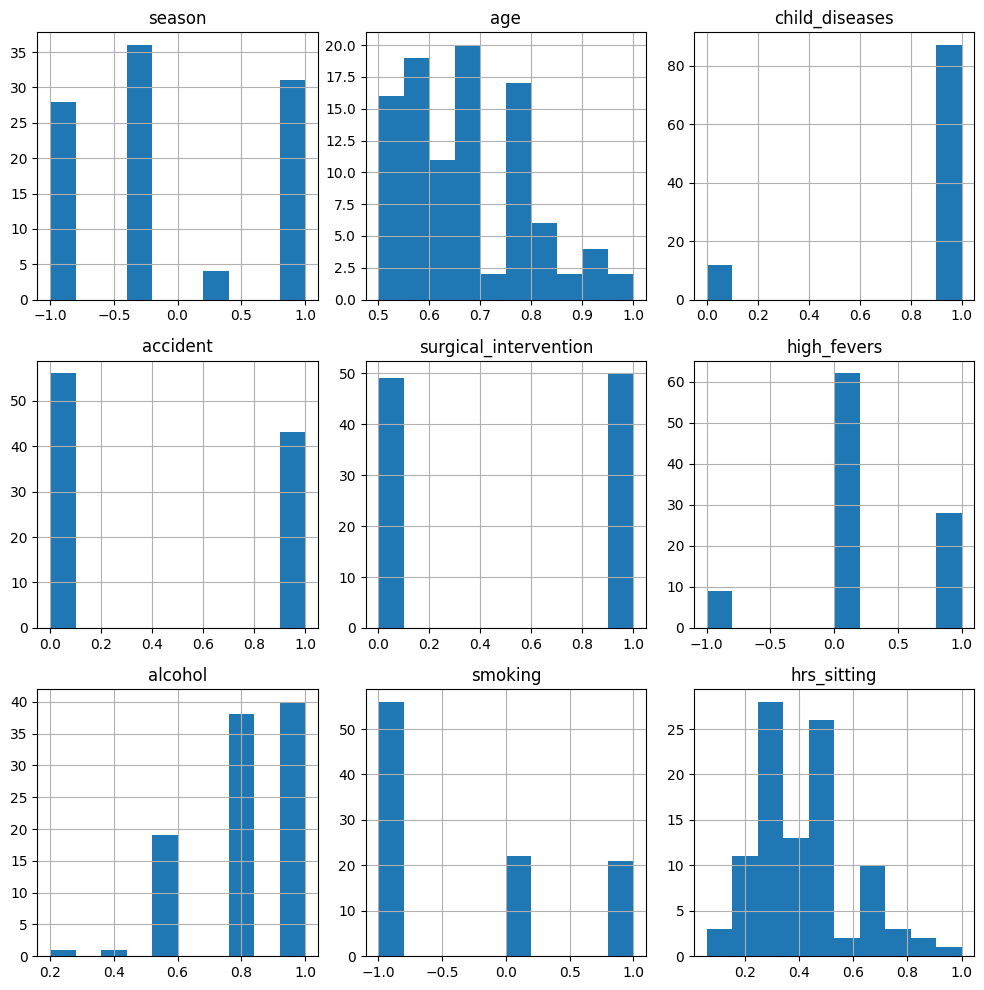

In [ ]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
df['diagonosis'] = df['diagonosis'].map({'O':1, 'N':0})
df.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagonosis
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


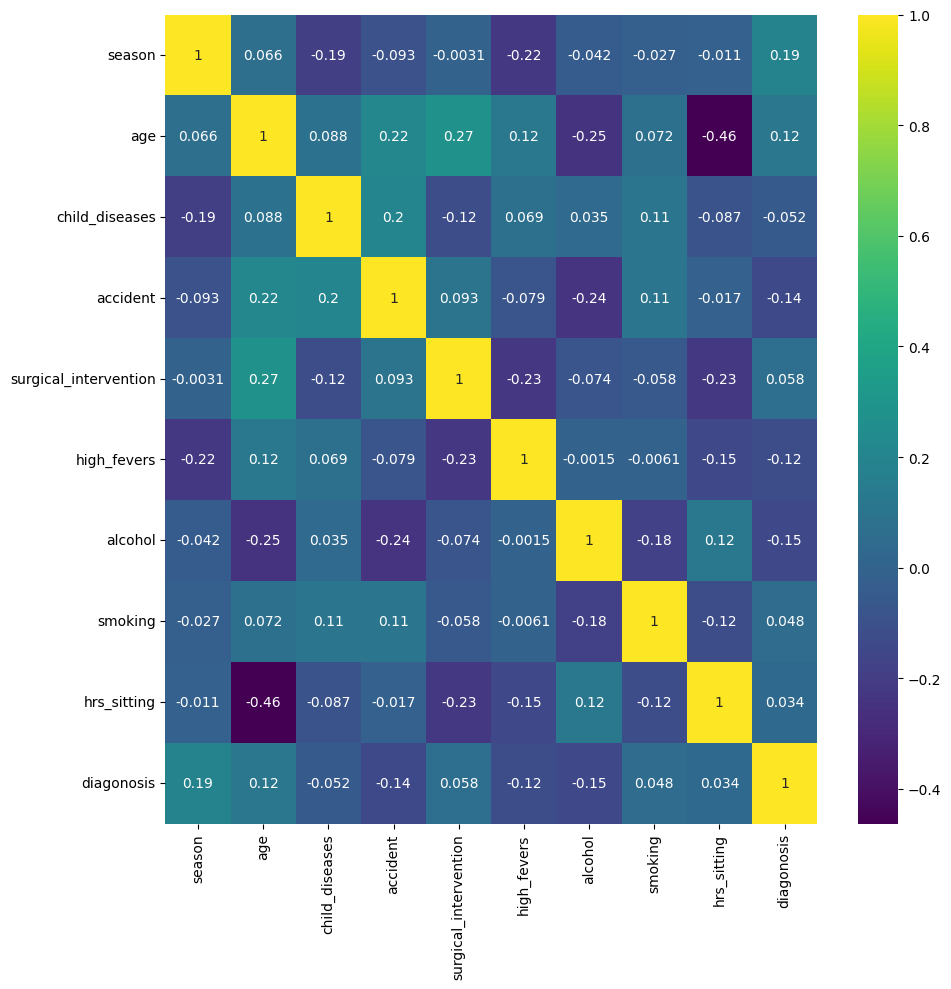

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('diagonosis', axis=1)
y = df['diagonosis']

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             diagonosis   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.345
Date:                Tue, 01 Oct 2024   Prob (F-statistic):              0.226
Time:                        07:37:58   Log-Likelihood:                -23.313
No. Observations:                  99   AIC:                             66.63
Df Residuals:                      89   BIC:                             92.58
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

# Filter out zeros from y_val
non_zero_indices = y_val != 0

# Calculate MAPE
val_mape = mean_absolute_percentage_error(y_val[non_zero_indices], y_val_pred[non_zero_indices])

In [ ]:
la = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

la_grid = GridSearchCV(la, param_grid, cv=5)

la_grid.fit(X, y)

print(la_grid.best_params_)

best_la = la_grid.best_estimator_

y_pred = best_la.predict(X)

non_zero_indices = y_pred != 0
val_mape = mean_absolute_percentage_error(y[non_zero_indices], y_pred[non_zero_indices])
print(val_mape)
print(r2_score(y, y_pred))
adj_r2 = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(adj_r2)

{'alpha': 0.1}
479722274357187.9
0.0
-0.11363636363636354


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape

((79, 10), (79,))

In [ ]:
X_test.shape, y_test.shape

((20, 10), (20,))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr =  LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

MAPE = 522727981534415.5
-1.2632518222380145


In [ ]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

MAPE = 521242785499974.5
-1.2601760430603761


In [ ]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

MAPE = 513068311978917.4
-1.1276860901920989


In [ ]:
grid_lr = LinearRegression()

param_grid = {
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [1,2,5,10,None],
    'positive': [True,False]
}

grid = GridSearchCV(grid_lr, param_grid, cv=5)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f'Best parameter : {best_params}')

best_lr = grid.best_estimator_
print(f'Best estimator : {best_lr}')

best_score = grid.best_score_
print(f'Accuracy : {best_score}')

y_pred = best_lr.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

Best parameter : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best estimator : LinearRegression(n_jobs=1, positive=True)
Accuracy : -0.08856415448465864
MAPE = 612522759638227.2
-1.4151354348015377


In [ ]:
la_grid = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

la_grid = GridSearchCV(la_grid, param_grid, cv=5)

la_grid.fit(X_train, y_train)

best_param = la_grid.best_params_
print(f'Best parameter : {best_param}')

best_la = la_grid.best_estimator_
print(f'Best estimator : {best_la}')

best_score = la_grid.best_score_
print(f'Accuracy : {best_score}')

y_pred = best_la.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

Best parameter : {'alpha': 1}
Best estimator : Lasso(alpha=1)
Accuracy : -0.04762823381797365
MAPE = 513068311978917.4
-1.1276860901920989


In [ ]:
rid_grid = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

rid_grid = GridSearchCV(rid_grid, param_grid, cv=5)

rid_grid.fit(X_train, y_train)

best_param = rid_grid.best_params_
print(f'Best parameter : {best_param}')

best_rid = rid_grid.best_estimator_
print(f'Best estimator : {best_rid}')

best_score = rid_grid.best_score_
print(f'Accuracy : {best_score}')

y_pred = best_rid.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

Best parameter : {'alpha': 100}
Best estimator : Ridge(alpha=100)
Accuracy : -0.05541771766931203
MAPE = 486332648401042.2
-1.167153859870953


In [ ]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
lr = LinearRegression()

lr.fit(X_resampled, y_resampled)

y_pred = lr.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

MAPE = 1366980310821938.2
-3.322670467667141


In [ ]:
rf = RandomForestRegressor()

rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

MAPE = 504403158265495.7
-1.2100987654320985


                 Feature  Importance
1                 season    0.232236
9            hrs_sitting    0.200753
7                alcohol    0.181810
2                    age    0.139515
4               accident    0.066860
6            high_fevers    0.059586
3         child_diseases    0.052173
8                smoking    0.035165
5  surgical_intervention    0.031902
0                  const    0.000000


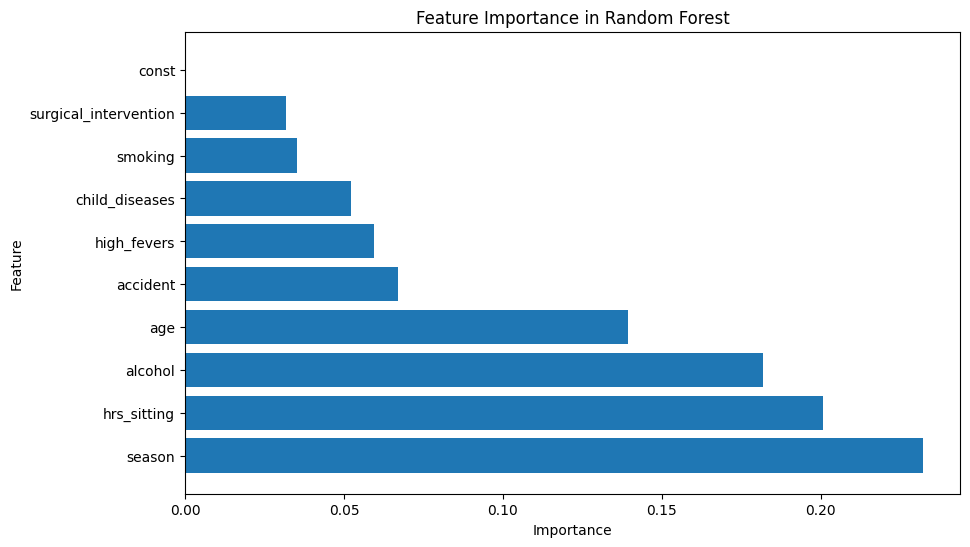

In [ ]:
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
top_features = 5
selected_features = importance_df['Feature'][:top_features].tolist()

print(f"Top {top_features} Selected Features:")
print(selected_features)

X_selected = X[selected_features]

X_s_train, X_s_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Top 5 Selected Features:
['season', 'hrs_sitting', 'alcohol', 'age', 'accident']


In [ ]:
rf_selected = RandomForestRegressor()
rf_selected.fit(X_s_train, y_train)

y_pred_selected = rf_selected.predict(X_s_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred_selected)}')
r2 = r2_score(y_test, y_pred_selected)
adj_r2 = 1 - (1-r2_score(y_test, y_pred_selected)) * (len(y_test)-1)/(len(y_test)-X_s_test.shape[1]-1)
print(adj_r2)

MAPE = 188250464424086.9
-0.2567719642857138


In [ ]:
rf_grid = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split' : [2,5,10]
}

rf_grid = GridSearchCV(rf_grid, param_grid, cv=5)

rf_grid.fit(X_resampled, y_resampled)

best_params = rf_grid.best_params_
print(f'Best parameter : {best_params}')

best_rf = rf_grid.best_estimator_
print(f'Best estimator : {best_rf}')

best_score = rf_grid.best_score_
print(f'Accuracy : {best_score}')

y_pred = best_rf.predict(X_test)

print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

Best parameter : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator : RandomForestRegressor(max_depth=20)
Accuracy : -0.004429314297471998
MAPE = 524669356588662.8
-1.6124999999999994
